**Scenario A**

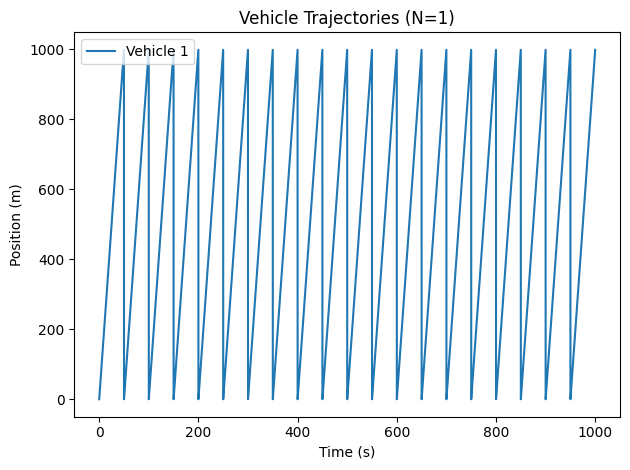

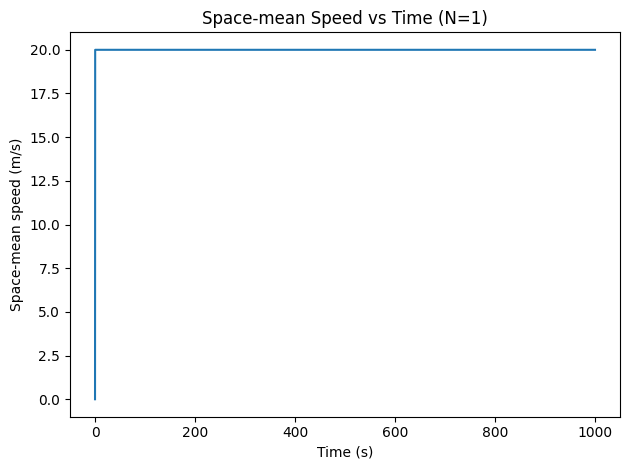

Density (veh/m)	Flow (veh/s)
0.010		0.200
0.011		0.218
0.012		0.236
0.013		0.255
0.014		0.273
0.015		0.291
0.015		0.309
0.016		0.327
0.017		0.345
0.018		0.364
0.019		0.382
0.020		0.400
0.021		0.418
0.022		0.436
0.023		0.455
0.024		0.455
0.025		0.450
0.025		0.445
0.026		0.441
0.027		0.437
0.028		0.433
0.029		0.429
0.030		0.425
0.031		0.438
0.032		0.434
0.033		0.430
0.034		0.426
0.035		0.422
0.035		0.418
0.036		0.414
0.037		0.411
0.038		0.407
0.039		0.403
0.040		0.400
0.041		0.409
0.042		0.405
0.043		0.402
0.044		0.398
0.045		0.395
0.045		0.391
0.046		0.388
0.047		0.385
0.048		0.381
0.049		0.378
0.050		0.375
0.051		0.382
0.052		0.378
0.053		0.375
0.054		0.372
0.055		0.369
0.055		0.365
0.056		0.362
0.057		0.359
0.058		0.356
0.059		0.353
0.060		0.350
0.061		0.355
0.062		0.352
0.063		0.349
0.064		0.346
0.065		0.343
0.065		0.340
0.066		0.337
0.067		0.334
0.068		0.331
0.069		0.328
0.070		0.325
0.071		0.329
0.072		0.326
0.073		0.323
0.074		0.320
0.075		0.317
0.075		0.314
0.076		0.311
0.077		0.

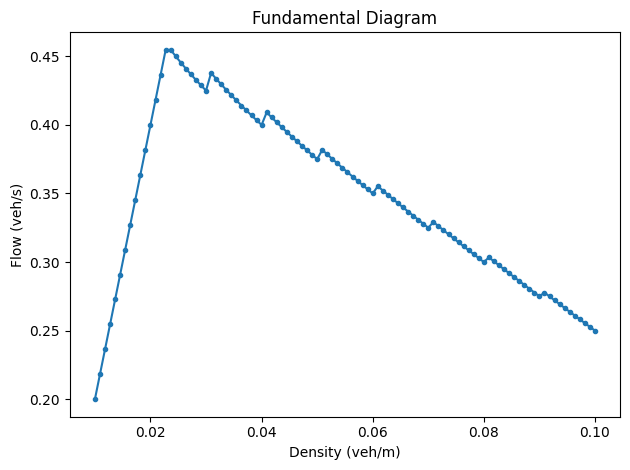

In [3]:
import numpy as np
import matplotlib.pyplot as plt


tau = 2.0         
L_vehicle = 5.0  
dt = 0.1          
v_f = 20.0        
L_road = 1000.0   
sim_time = 1000.0  
num_steps = int(sim_time / dt)

def simulate_ring(N):
    positions = np.linspace(0, L_road, N, endpoint=False)
    speeds = np.zeros(N)
    pos_history = np.zeros((num_steps, N))
    avg_speed_time = np.zeros(num_steps)

    for t in range(num_steps):
        pos_history[t] = positions
        avg_speed_time[t] = speeds.mean()

        next_pos = np.roll(positions, -1)
        gap = (next_pos - positions - L_vehicle) % L_road
        speeds = np.minimum(gap / tau, v_f)
        positions = (positions + speeds * dt) % L_road

    return pos_history, avg_speed_time

while True:
    try:
        N_sample = int(input("Enter number of vehicles (1–120): "))
        if 1 <= N_sample <= 120:
            break
        print("Please enter an integer between 1 and 120.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

pos_hist, avg_speed_time = simulate_ring(N_sample)
time = np.arange(num_steps) * dt

plt.figure()
for i in range(min(5, N_sample)):
    plt.plot(time, pos_hist[:, i], label=f'Vehicle {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Vehicle Trajectories (N={N_sample})')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(time, avg_speed_time)
plt.xlabel('Time (s)')
plt.ylabel('Space‑mean speed (m/s)')
plt.title(f'Space‑mean Speed vs Time (N={N_sample})')
plt.tight_layout()
plt.show()

densities = np.linspace(0.01, 0.1, 100)
flows = []
for dens in densities:
    N_i = max(2, int(dens * L_road))
    _, avg_speed_time_i = simulate_ring(N_i)
    steady_speed = avg_speed_time_i[num_steps // 2 :].mean()
    flows.append(dens * steady_speed)

print("Density (veh/m)\tFlow (veh/s)")
for k, q in zip(densities, flows):
    print(f"{k:.3f}\t\t{q:.3f}")

plt.figure()
plt.plot(densities, flows, marker='.')
plt.xlabel('Density (veh/m)')
plt.ylabel('Flow (veh/s)')
plt.title('Fundamental Diagram')
plt.tight_layout()
plt.show()

**Scenario B**

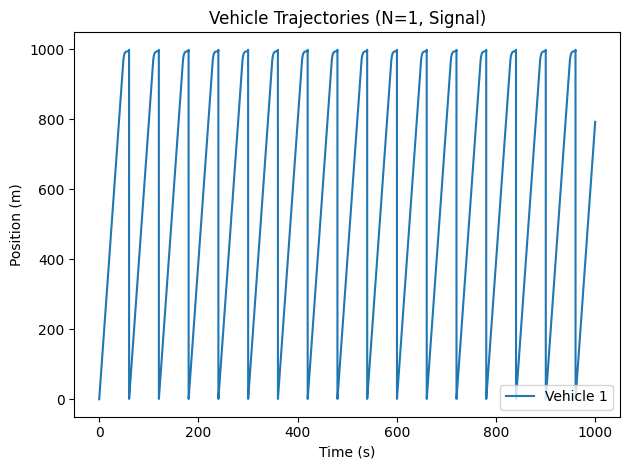

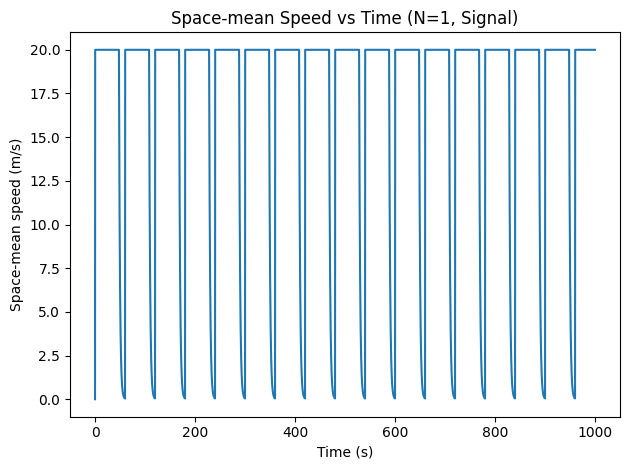


Density (veh/m)	Flow (veh/s)
0.010		0.168
0.011		0.183
0.012		0.198
0.013		0.213
0.014		0.229
0.015		0.244
0.015		0.259
0.016		0.257
0.017		0.255
0.018		0.254
0.019		0.253
0.020		0.252
0.021		0.263
0.022		0.262
0.023		0.260
0.024		0.259
0.025		0.258
0.025		0.257
0.026		0.256
0.027		0.255
0.028		0.254
0.029		0.253
0.030		0.252
0.031		0.260
0.032		0.259
0.033		0.258
0.034		0.258
0.035		0.257
0.035		0.256
0.036		0.256
0.037		0.255
0.038		0.254
0.039		0.254
0.040		0.253
0.041		0.259
0.042		0.258
0.043		0.258
0.044		0.257
0.045		0.257
0.045		0.256
0.046		0.255
0.047		0.255
0.048		0.254
0.049		0.254
0.050		0.253
0.051		0.258
0.052		0.258
0.053		0.257
0.054		0.256
0.055		0.256
0.055		0.255
0.056		0.255
0.057		0.254
0.058		0.254
0.059		0.254
0.060		0.253
0.061		0.257
0.062		0.256
0.063		0.256
0.064		0.255
0.065		0.255
0.065		0.254
0.066		0.254
0.067		0.254
0.068		0.253
0.069		0.253
0.070		0.252
0.071		0.255
0.072		0.255
0.073		0.255
0.074		0.254
0.075		0.254
0.075		0.253
0.076		0.253
0.077		0

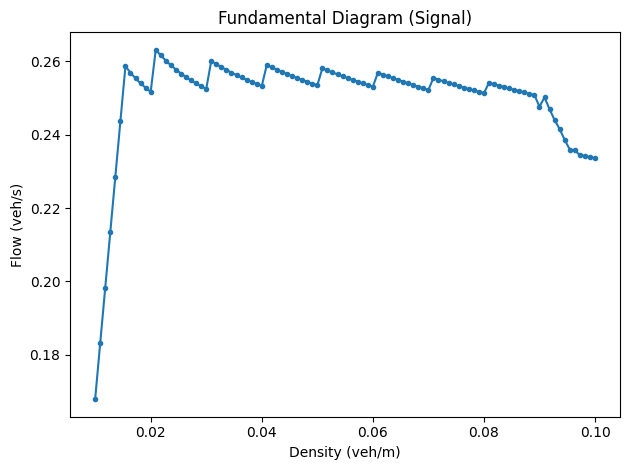

In [2]:
import numpy as np
import matplotlib.pyplot as plt


tau = 2.0         
L_vehicle = 5.0  
dt = 0.1       
v_f = 20.0        
L_road = 1000.0    
sim_time = 1000.0   
num_steps = int(sim_time / dt)

signal_pos = 0.0           
cycle_time = 60.0          
green_ratio = 0.5     

def simulate_ring_signal(N):
    positions = np.linspace(0, L_road, N, endpoint=False)
    speeds = np.zeros(N)
    pos_history = np.zeros((num_steps, N))
    avg_speed_time = np.zeros(num_steps)

    for t in range(num_steps):
        current_time = t * dt
        t_mod = current_time % cycle_time
        is_green = (t_mod < cycle_time * green_ratio)

        pos_history[t] = positions
        avg_speed_time[t] = speeds.mean()

    
        next_pos = np.roll(positions, -1)
        gap_vehicle = (next_pos - positions - L_vehicle) % L_road

    
        if not is_green:
            gap_signal = (signal_pos - positions - L_vehicle) % L_road
            effective_gap = np.minimum(gap_vehicle, gap_signal)
        else:
            effective_gap = gap_vehicle

    
        speeds = np.minimum(effective_gap / tau, v_f)
        positions = (positions + speeds * dt) % L_road

    return pos_history, avg_speed_time

while True:
    try:
        N_sample = int(input("Enter number of vehicles (1–120): "))
        if 1 <= N_sample <= 120:
            break
        print("Please enter an integer between 1 and 120.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

pos_hist, avg_speed_time = simulate_ring_signal(N_sample)
time = np.arange(num_steps) * dt

plt.figure()
for i in range(min(5, N_sample)):
    plt.plot(time, pos_hist[:, i], label=f'Vehicle {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Vehicle Trajectories (N={N_sample}, Signal)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(time, avg_speed_time)
plt.xlabel('Time (s)')
plt.ylabel('Space‑mean speed (m/s)')
plt.title(f'Space‑mean Speed vs Time (N={N_sample}, Signal)')
plt.tight_layout()
plt.show()

densities = np.linspace(0.01, 0.1, 100)
flows = []
for dens in densities:
    N_i = max(1, int(dens * L_road))
    _, avg_speed_time_i = simulate_ring_signal(N_i)
    steady_speed = avg_speed_time_i[num_steps//2:].mean()
    flows.append(dens * steady_speed)

print("\nDensity (veh/m)\tFlow (veh/s)")
for k, q in zip(densities, flows):
    print(f"{k:.3f}\t\t{q:.3f}")

plt.figure()
plt.plot(densities, flows, marker='.')
plt.xlabel('Density (veh/m)')
plt.ylabel('Flow (veh/s)')
plt.title('Fundamental Diagram (Signal)')
plt.tight_layout()
plt.show()

**Scenario B with three green light ratios**

Please enter an integer between 1 and 120.


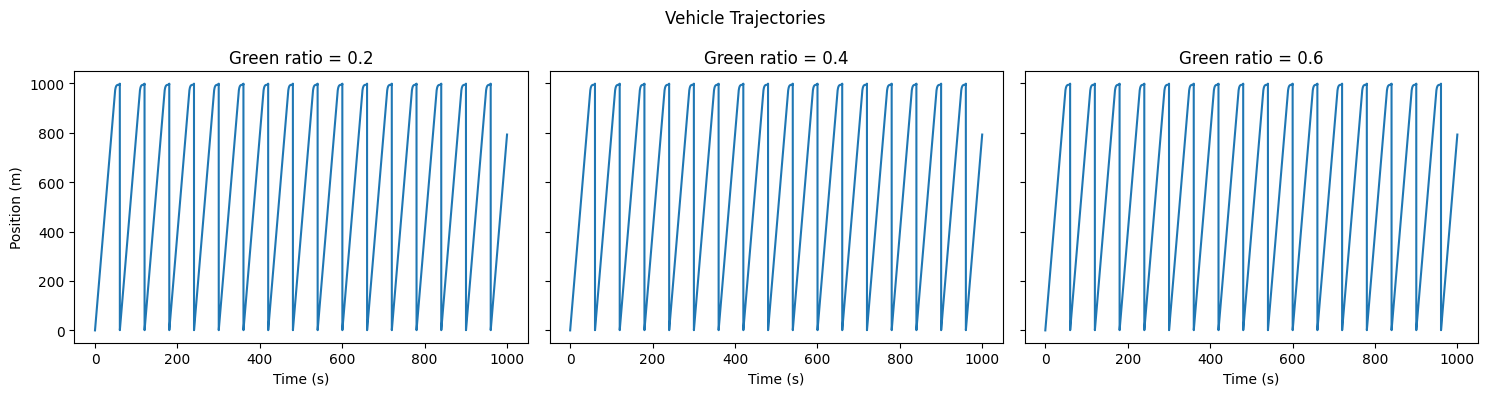

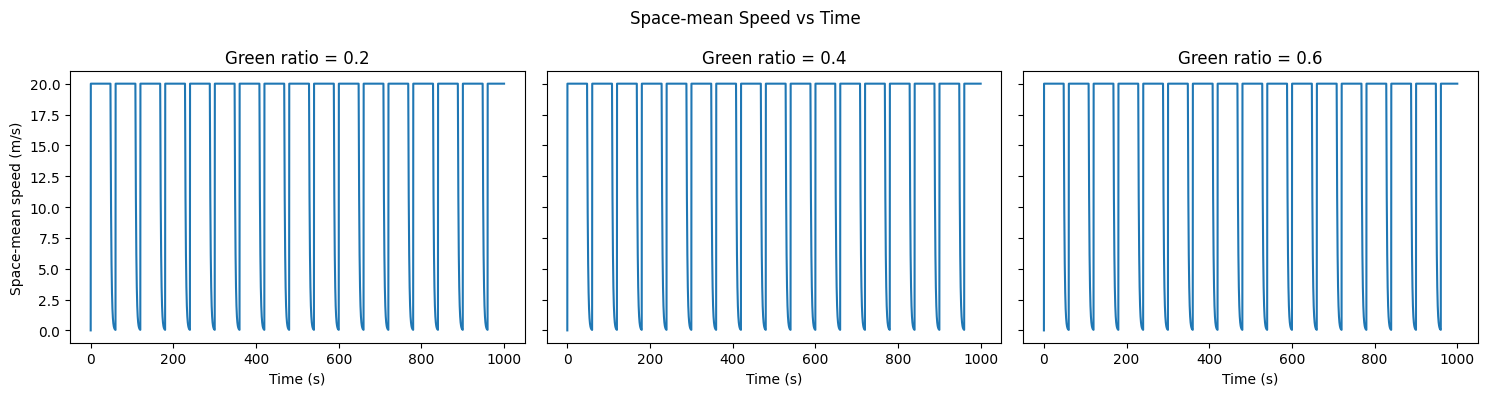

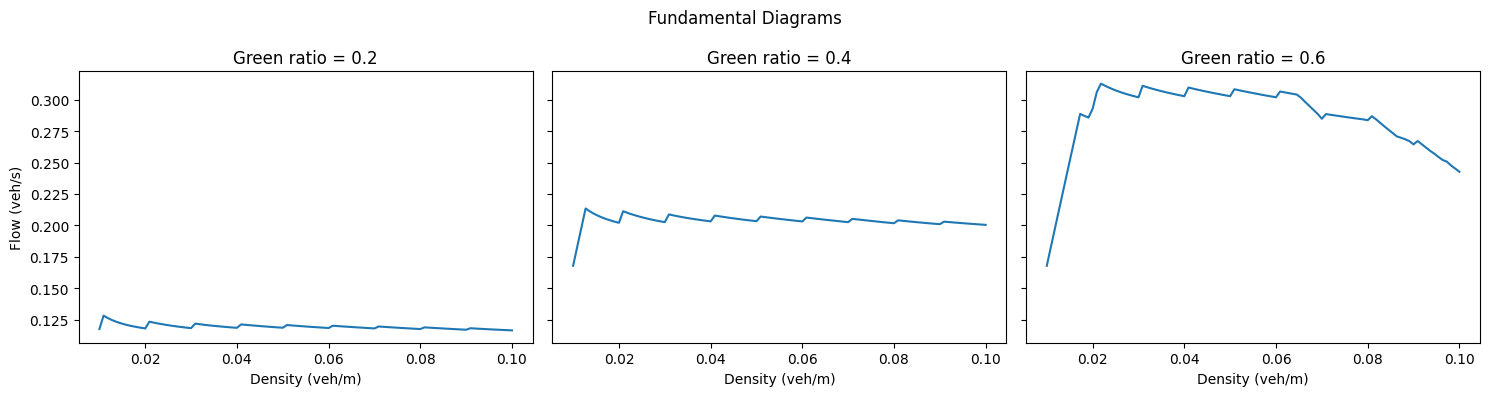

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tau = 2.0
L_vehicle = 5.0
dt = 0.1
v_f = 20.0
L_road = 1000.0
sim_time = 1000.0
num_steps = int(sim_time / dt)

signal_pos = 0.0
cycle_time = 60.0

def simulate_ring_signal(N, green_ratio):
    positions = np.linspace(0, L_road, N, endpoint=False)
    speeds = np.zeros(N)
    pos_history = np.zeros((num_steps, N))
    avg_speed_time = np.zeros(num_steps)

    for t in range(num_steps):
        current_time = t * dt
        is_green = (current_time % cycle_time) < cycle_time * green_ratio

        pos_history[t] = positions
        avg_speed_time[t] = speeds.mean()

        next_pos = np.roll(positions, -1)
        gap_vehicle = (next_pos - positions - L_vehicle) % L_road

        if not is_green:
            gap_signal = (signal_pos - positions - L_vehicle) % L_road
            effective_gap = np.minimum(gap_vehicle, gap_signal)
        else:
            effective_gap = gap_vehicle

        speeds = np.minimum(effective_gap / tau, v_f)
        positions = (positions + speeds * dt) % L_road

    return pos_history, avg_speed_time

while True:
    try:
        N = int(input("Enter number of vehicles (1–120): "))
        if 1 <= N <= 120:
            break
    except ValueError:
        pass
    print("Please enter an integer between 1 and 120.")

time = np.arange(num_steps) * dt
ratios = [0.2, 0.4, 0.6]

fig1, axes1 = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
for ax, gr in zip(axes1, ratios):
    pos_hist, _ = simulate_ring_signal(N, gr)
    for i in range(min(5, N)):
        ax.plot(time, pos_hist[:, i])
    ax.set_title(f"Green ratio = {gr}")
    ax.set_xlabel("Time (s)")
axes1[0].set_ylabel("Position (m)")
fig1.suptitle("Vehicle Trajectories")
plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
for ax, gr in zip(axes2, ratios):
    _, avg_speed = simulate_ring_signal(N, gr)
    ax.plot(time, avg_speed)
    ax.set_title(f"Green ratio = {gr}")
    ax.set_xlabel("Time (s)")
axes2[0].set_ylabel("Space-mean speed (m/s)")
fig2.suptitle("Space-mean Speed vs Time")
plt.tight_layout()
plt.show()

densities = np.linspace(0.01, 0.1, 100)
fig3, axes3 = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
for ax, gr in zip(axes3, ratios):
    flows = []
    for dens in densities:
        N_i = max(1, int(dens * L_road))
        _, avg_speed = simulate_ring_signal(N_i, gr)
        flows.append(dens * avg_speed[num_steps//2:].mean())
    ax.plot(densities, flows)
    ax.set_title(f"Green ratio = {gr}")
    ax.set_xlabel("Density (veh/m)")
axes3[0].set_ylabel("Flow (veh/s)")
fig3.suptitle("Fundamental Diagrams")
plt.tight_layout()
plt.show()
